In [1]:
import pandas as pd
import numpy as np

#### 컬럼명 설명 
- TransactionNo : 거래 번호
- Date : 날짜 
- ProductNo : 상품 번호
- ProductName : 상품 명
- Price : 상품 가격
- Quantity : 수량 
- CustomerNo : 소비자 번호
- Country : 국가 

In [2]:
df = pd.read_csv('./datasets/Sales.csv')
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [3]:
df.isna().sum() # 사용자 번호에 55개의 결측치 발견

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [4]:
df = df.drop(index=df[df['CustomerNo'].isna()].index, axis=1) # 결측치 제거 
df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [5]:
# 사용자 번호를 정수형(int 16)으로 바꿔준다.
df = df.astype({'CustomerNo' : np.int16})
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472,Germany


In [6]:
df = df.reset_index(drop=True) # 인덱스 초기화
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom
...,...,...,...,...,...,...,...,...
536290,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472,Germany
536291,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472,Germany
536292,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472,Germany
536293,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472,Germany


### Monetary는 quantity가 음수인 경우 까지 계산해주고 0으로 치환한다. 
- quantity 음수 -> 환불 

In [7]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y/%m/%d')
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019/12/09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom
1,581475,2019/12/09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom
2,581475,2019/12/09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom
3,581475,2019/12/09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom
4,581475,2019/12/09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom
...,...,...,...,...,...,...,...,...
536290,C536548,2018/12/01,22168,Organiser Wood Antique White,18.96,-2,12472,Germany
536291,C536548,2018/12/01,21218,Red Spotty Biscuit Tin,14.09,-3,12472,Germany
536292,C536548,2018/12/01,20957,Porcelain Hanging Bell Small,11.74,-1,12472,Germany
536293,C536548,2018/12/01,22580,Advent Calendar Gingham Sack,16.35,-4,12472,Germany


In [8]:
# df.loc[:, 'Recency'] = pd.to_datetime(df['Date'])\
#                     .apply(lambda x: (pd.to_datetime('2019-12-10') - x).days)
# df
df['Recency'] = (pd.to_datetime('2019-12-10') - pd.to_datetime(df['Date'])).dt.days
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Recency
0,581482,2019/12/09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,1
1,581475,2019/12/09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,1
2,581475,2019/12/09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,1
3,581475,2019/12/09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,1
4,581475,2019/12/09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
536290,C536548,2018/12/01,22168,Organiser Wood Antique White,18.96,-2,12472,Germany,374
536291,C536548,2018/12/01,21218,Red Spotty Biscuit Tin,14.09,-3,12472,Germany,374
536292,C536548,2018/12/01,20957,Porcelain Hanging Bell Small,11.74,-1,12472,Germany,374
536293,C536548,2018/12/01,22580,Advent Calendar Gingham Sack,16.35,-4,12472,Germany,374


In [9]:
rf_df = df.groupby('CustomerNo').agg(Recency=('Recency','min'), Frequency=('CustomerNo','count'))
rf_df

,Recency,Frequency
CustomerNo,,
12004,228,56
12006,219,1
12008,277,203
12013,360,1
12024,177,5
...,...,...
18280,278,10
18281,181,7
18282,8,13


In [10]:
rf_df.reset_index()

,CustomerNo,Recency,Frequency
0,12004,228,56
1,12006,219,1
2,12008,277,203
3,12013,360,1
4,12024,177,5
...,...,...,...
4733,18280,278,10
4734,18281,181,7
4735,18282,8,13
4736,18283,4,754


In [11]:
m_df = df.copy()
m_df.loc[:,'Monetary'] = m_df['Quantity'] * m_df['Price']
m_df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Recency,Monetary
0,581482,2019/12/09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,1,257.64
1,581475,2019/12/09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,1,383.40
2,581475,2019/12/09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,1,138.36
3,581475,2019/12/09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,1,127.80
4,581475,2019/12/09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,1,71.64
...,...,...,...,...,...,...,...,...,...,...
536290,C536548,2018/12/01,22168,Organiser Wood Antique White,18.96,-2,12472,Germany,374,-37.92
536291,C536548,2018/12/01,21218,Red Spotty Biscuit Tin,14.09,-3,12472,Germany,374,-42.27
536292,C536548,2018/12/01,20957,Porcelain Hanging Bell Small,11.74,-1,12472,Germany,374,-11.74
536293,C536548,2018/12/01,22580,Advent Calendar Gingham Sack,16.35,-4,12472,Germany,374,-65.40


In [12]:
m_df = m_df.groupby('CustomerNo')[['Monetary']].sum()
m_df

,Monetary
CustomerNo,
12004,1509.60
12006,24.76
12008,5689.57
12013,69.96
12024,149.52
...,...
18280,623.26
18281,576.58
18282,992.11


In [13]:
rf_df = rf_df.reset_index()
rf_df

,CustomerNo,Recency,Frequency
0,12004,228,56
1,12006,219,1
2,12008,277,203
3,12013,360,1
4,12024,177,5
...,...,...,...
4733,18280,278,10
4734,18281,181,7
4735,18282,8,13
4736,18283,4,754


In [14]:
m_df = m_df.reset_index()
m_df

,CustomerNo,Monetary
0,12004,1509.60
1,12006,24.76
2,12008,5689.57
3,12013,69.96
4,12024,149.52
...,...,...
4733,18280,623.26
4734,18281,576.58
4735,18282,992.11
4736,18283,12114.61


In [15]:
rfm_df = rf_df.merge(m_df, on='CustomerNo')
rfm_df

,CustomerNo,Recency,Frequency,Monetary
0,12004,228,56,1509.60
1,12006,219,1,24.76
2,12008,277,203,5689.57
3,12013,360,1,69.96
4,12024,177,5,149.52
...,...,...,...,...
4733,18280,278,10,623.26
4734,18281,181,7,576.58
4735,18282,8,13,992.11
4736,18283,4,754,12114.61


In [16]:
rfm_df.iloc[rfm_df[rfm_df['Monetary'] < 0].index] = 0
rfm_df[rfm_df['Monetary'] < 0]

,CustomerNo,Recency,Frequency,Monetary


In [17]:
rfm_df

,CustomerNo,Recency,Frequency,Monetary
0,12004,228,56,1509.60
1,12006,219,1,24.76
2,12008,277,203,5689.57
3,12013,360,1,69.96
4,12024,177,5,149.52
...,...,...,...,...
4733,18280,278,10,623.26
4734,18281,181,7,576.58
4735,18282,8,13,992.11
4736,18283,4,754,12114.61


In [18]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [19]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

,CustomerNo,Recency,Frequency,Monetary
0,12004,0.609626,0.007029,0.000716
1,12006,0.585561,0.000126,0.000012
2,12008,0.740642,0.025480,0.002698
3,12013,0.962567,0.000126,0.000033
4,12024,0.473262,0.000628,0.000071
...,...,...,...,...
4733,18280,0.743316,0.001255,0.000296
4734,18281,0.483957,0.000879,0.000273
4735,18282,0.021390,0.001632,0.000470
4736,18283,0.010695,0.094640,0.005744


In [20]:
rfm_df['Recency'] = 1 - rfm_df['Recency']

In [21]:
rfm_df

,CustomerNo,Recency,Frequency,Monetary
0,12004,0.390374,0.007029,0.000716
1,12006,0.414439,0.000126,0.000012
2,12008,0.259358,0.025480,0.002698
3,12013,0.037433,0.000126,0.000033
4,12024,0.526738,0.000628,0.000071
...,...,...,...,...
4733,18280,0.256684,0.001255,0.000296
4734,18281,0.516043,0.000879,0.000273
4735,18282,0.978610,0.001632,0.000470
4736,18283,0.989305,0.094640,0.005744


In [22]:
rfm_df.loc[:, 'TotalScore'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']
rfm_df

,CustomerNo,Recency,Frequency,Monetary,TotalScore
0,12004,0.390374,0.007029,0.000716,0.398119
1,12006,0.414439,0.000126,0.000012,0.414576
2,12008,0.259358,0.025480,0.002698,0.287536
3,12013,0.037433,0.000126,0.000033,0.037592
4,12024,0.526738,0.000628,0.000071,0.527436
...,...,...,...,...,...
4733,18280,0.256684,0.001255,0.000296,0.258235
4734,18281,0.516043,0.000879,0.000273,0.517195
4735,18282,0.978610,0.001632,0.000470,0.980712
4736,18283,0.989305,0.094640,0.005744,1.089690


In [23]:
merge_df = df.merge(rfm_df[['CustomerNo', 'TotalScore']], on='CustomerNo')
merge_df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Recency,TotalScore
0,581482,2019/12/09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,1,1.014025
1,581481,2019/12/09,21115,Rose Caravan Doorstop,12.25,8,17490,United Kingdom,1,1.014025
2,581481,2019/12/09,22059,Ceramic Strawberry Design Mug,10.65,24,17490,United Kingdom,1,1.014025
3,581481,2019/12/09,22072,Red Retrospot Tea Cup And Saucer,11.53,24,17490,United Kingdom,1,1.014025
4,581481,2019/12/09,22123,Ping Microwave Apron,11.06,24,17490,United Kingdom,1,1.014025
...,...,...,...,...,...,...,...,...,...,...
535950,536597,2018/12/01,20755,Blue Paisley Pocket Book,11.12,6,18011,United Kingdom,374,0.003904
535951,536597,2018/12/01,22384,Lunch Bag Pink Polkadot,5.97,1,18011,United Kingdom,374,0.003904
535952,536597,2018/12/01,20726,Lunch Bag Woodland,5.97,1,18011,United Kingdom,374,0.003904
535953,536597,2018/12/01,22220,Cake Stand Lovebird 2 Tier White,20.45,1,18011,United Kingdom,374,0.003904


In [24]:
import numpy as np

l1, l2, l3, l4 = np.percentile(merge_df['TotalScore'], [20, 50, 75, 90])
print(l1, l2, l3, l4)

0.8272871502781596 0.990604689172085 1.0505734929098685 1.1654528796424704


In [25]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [26]:
merge_df['Level'] = merge_df['TotalScore'].apply(get_level)
merge_df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Recency,TotalScore,Level
0,581482,2019/12/09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,1,1.014025,3
1,581481,2019/12/09,21115,Rose Caravan Doorstop,12.25,8,17490,United Kingdom,1,1.014025,3
2,581481,2019/12/09,22059,Ceramic Strawberry Design Mug,10.65,24,17490,United Kingdom,1,1.014025,3
3,581481,2019/12/09,22072,Red Retrospot Tea Cup And Saucer,11.53,24,17490,United Kingdom,1,1.014025,3
4,581481,2019/12/09,22123,Ping Microwave Apron,11.06,24,17490,United Kingdom,1,1.014025,3
...,...,...,...,...,...,...,...,...,...,...,...
535950,536597,2018/12/01,20755,Blue Paisley Pocket Book,11.12,6,18011,United Kingdom,374,0.003904,5
535951,536597,2018/12/01,22384,Lunch Bag Pink Polkadot,5.97,1,18011,United Kingdom,374,0.003904,5
535952,536597,2018/12/01,20726,Lunch Bag Woodland,5.97,1,18011,United Kingdom,374,0.003904,5
535953,536597,2018/12/01,22220,Cake Stand Lovebird 2 Tier White,20.45,1,18011,United Kingdom,374,0.003904,5


In [27]:
merge_df['Level'] = merge_df['Level'].replace([5,4,3,2,1],
                                             ['Silver','Gold','Royal','VIP','VVIP'])

In [28]:
merge_df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Recency,TotalScore,Level
0,581482,2019/12/09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,1,1.014025,Royal
1,581481,2019/12/09,21115,Rose Caravan Doorstop,12.25,8,17490,United Kingdom,1,1.014025,Royal
2,581481,2019/12/09,22059,Ceramic Strawberry Design Mug,10.65,24,17490,United Kingdom,1,1.014025,Royal
3,581481,2019/12/09,22072,Red Retrospot Tea Cup And Saucer,11.53,24,17490,United Kingdom,1,1.014025,Royal
4,581481,2019/12/09,22123,Ping Microwave Apron,11.06,24,17490,United Kingdom,1,1.014025,Royal
...,...,...,...,...,...,...,...,...,...,...,...
535950,536597,2018/12/01,20755,Blue Paisley Pocket Book,11.12,6,18011,United Kingdom,374,0.003904,Silver
535951,536597,2018/12/01,22384,Lunch Bag Pink Polkadot,5.97,1,18011,United Kingdom,374,0.003904,Silver
535952,536597,2018/12/01,20726,Lunch Bag Woodland,5.97,1,18011,United Kingdom,374,0.003904,Silver
535953,536597,2018/12/01,22220,Cake Stand Lovebird 2 Tier White,20.45,1,18011,United Kingdom,374,0.003904,Silver


#### 회원 등급 분석 
> 로얄등급이 가장 많고, 실버,골드,VIP 등급 분포는 동일하며 VVIP 회원의 분포가 가장 적다.

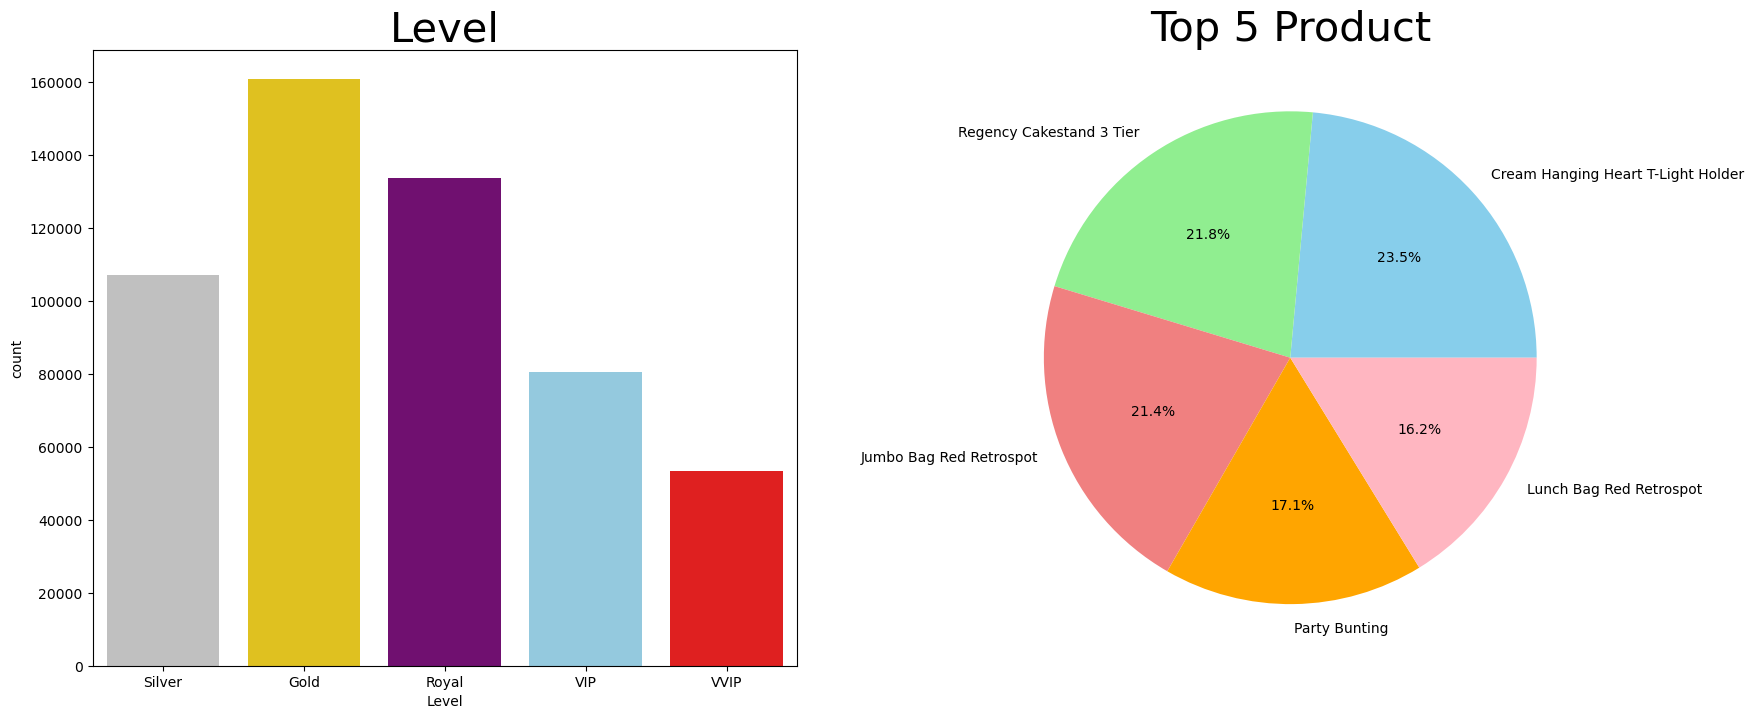

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

product_counts = merge_df['ProductName'].value_counts()
top_products = product_counts.head(5)
product_filter_df = merge_df[merge_df['ProductName'].isin(top_products.index)]

order_columns = ['Silver', 'Gold', 'Royal', 'VIP', 'VVIP']
colors = {'Silver': 'silver', 'Gold': 'gold', 'Royal': 'purple', 'VIP': 'skyblue', 'VVIP': 'red'}

pie_colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink']

sns.countplot(ax=axes[0], x='Level', data=merge_df, palette=colors, order=order_columns)
axes[0].set_title('Level', fontsize=30)


axes[1].pie(product_filter_df['ProductName'].value_counts(), labels=top_products.index, colors=pie_colors, autopct='%1.1f%%')
axes[1].set_title('Top 5 Product', fontsize=30)

plt.show()


Text(0, 0.5, 'Income')

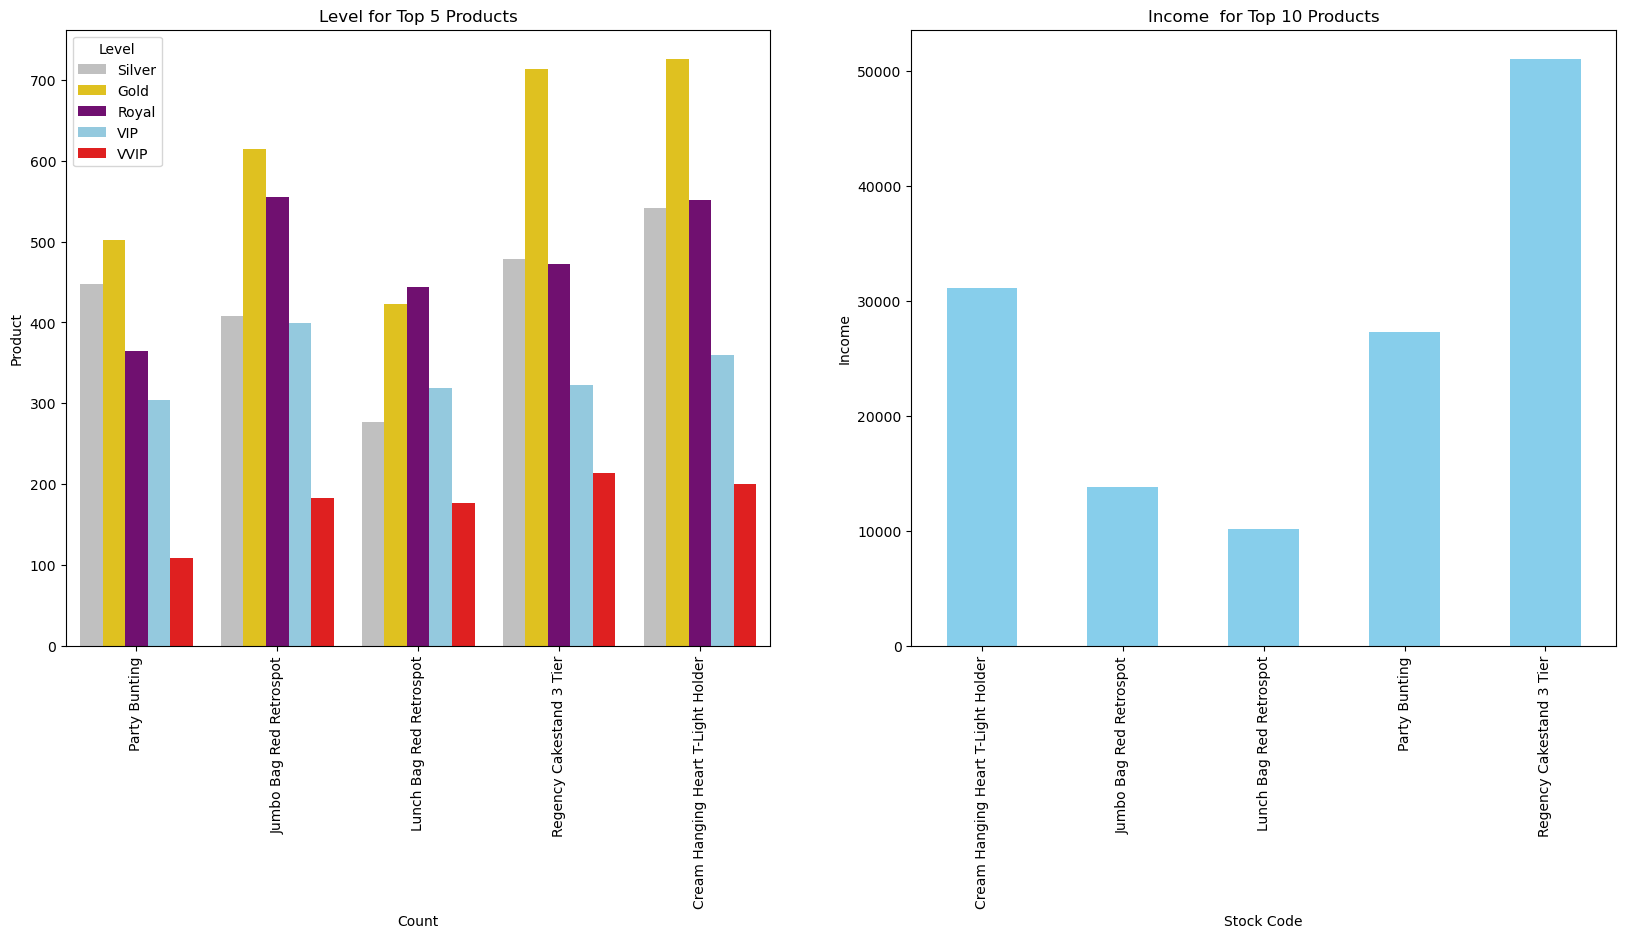

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt 
colors = {'Silver': 'silver', 'Gold': 'gold', 'Royal': 'purple', 'VIP': 'skyblue', 'VVIP': 'red'}
order_columns = ['Silver', 'Gold','Royal','VIP', 'VVIP']


top_product = merge_df['ProductName'].value_counts().head(5).index
top_country = merge_df['Country'].value_counts().head(5).index

fig, axes = plt.subplots(1, 2, figsize=(20,8))

# 나이별 회원 등급 분석
sns.countplot(ax=axes[0], x='ProductName', hue='Level', data=merge_df[merge_df['ProductName'].isin(top_product)], palette=colors, hue_order=order_columns)
axes[0].set_title('Level for Top 5 Products')
axes[0].set_ylabel('Product')
axes[0].set_xlabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# 오른쪽 그래프: 영국(United Kingdom)에 대한 등급별 RFM 합산 차트 시각화 
price_sum = product_filter_df.groupby('ProductName')['Price'].sum()
price_sum.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Income  for Top 10 Products')
axes[1].set_xlabel('Stock Code')
axes[1].set_ylabel('Income')

In [31]:
merge_df['ProductName'].value_counts().head(5)

ProductName
Cream Hanging Heart T-Light Holder    2377
Regency Cakestand 3 Tier              2199
Jumbo Bag Red Retrospot               2159
Party Bunting                         1726
Lunch Bag Red Retrospot               1639
Name: count, dtype: int64

In [32]:
country_df = merge_df.groupby(['Country','ProductName']).size().reset_index()
country_df

,Country,ProductName,0
0,Australia,10 Colour Spaceboy Pen,1
1,Australia,12 Pencil Small Tube Woodland,1
2,Australia,12 Pencils Tall Tube Posy,2
3,Australia,12 Pencils Tall Tube Red Retrospot,1
4,Australia,16 Piece Cutlery Set Pantry Design,1
...,...,...,...
22257,Unspecified,Wrap Vintage Doily,1
22258,Unspecified,Wrap Vintage Leaf Design,1
22259,Unspecified,Wrap Wedding Day,1
22260,Unspecified,Yuletide Images S/6 Paper Boxes,1


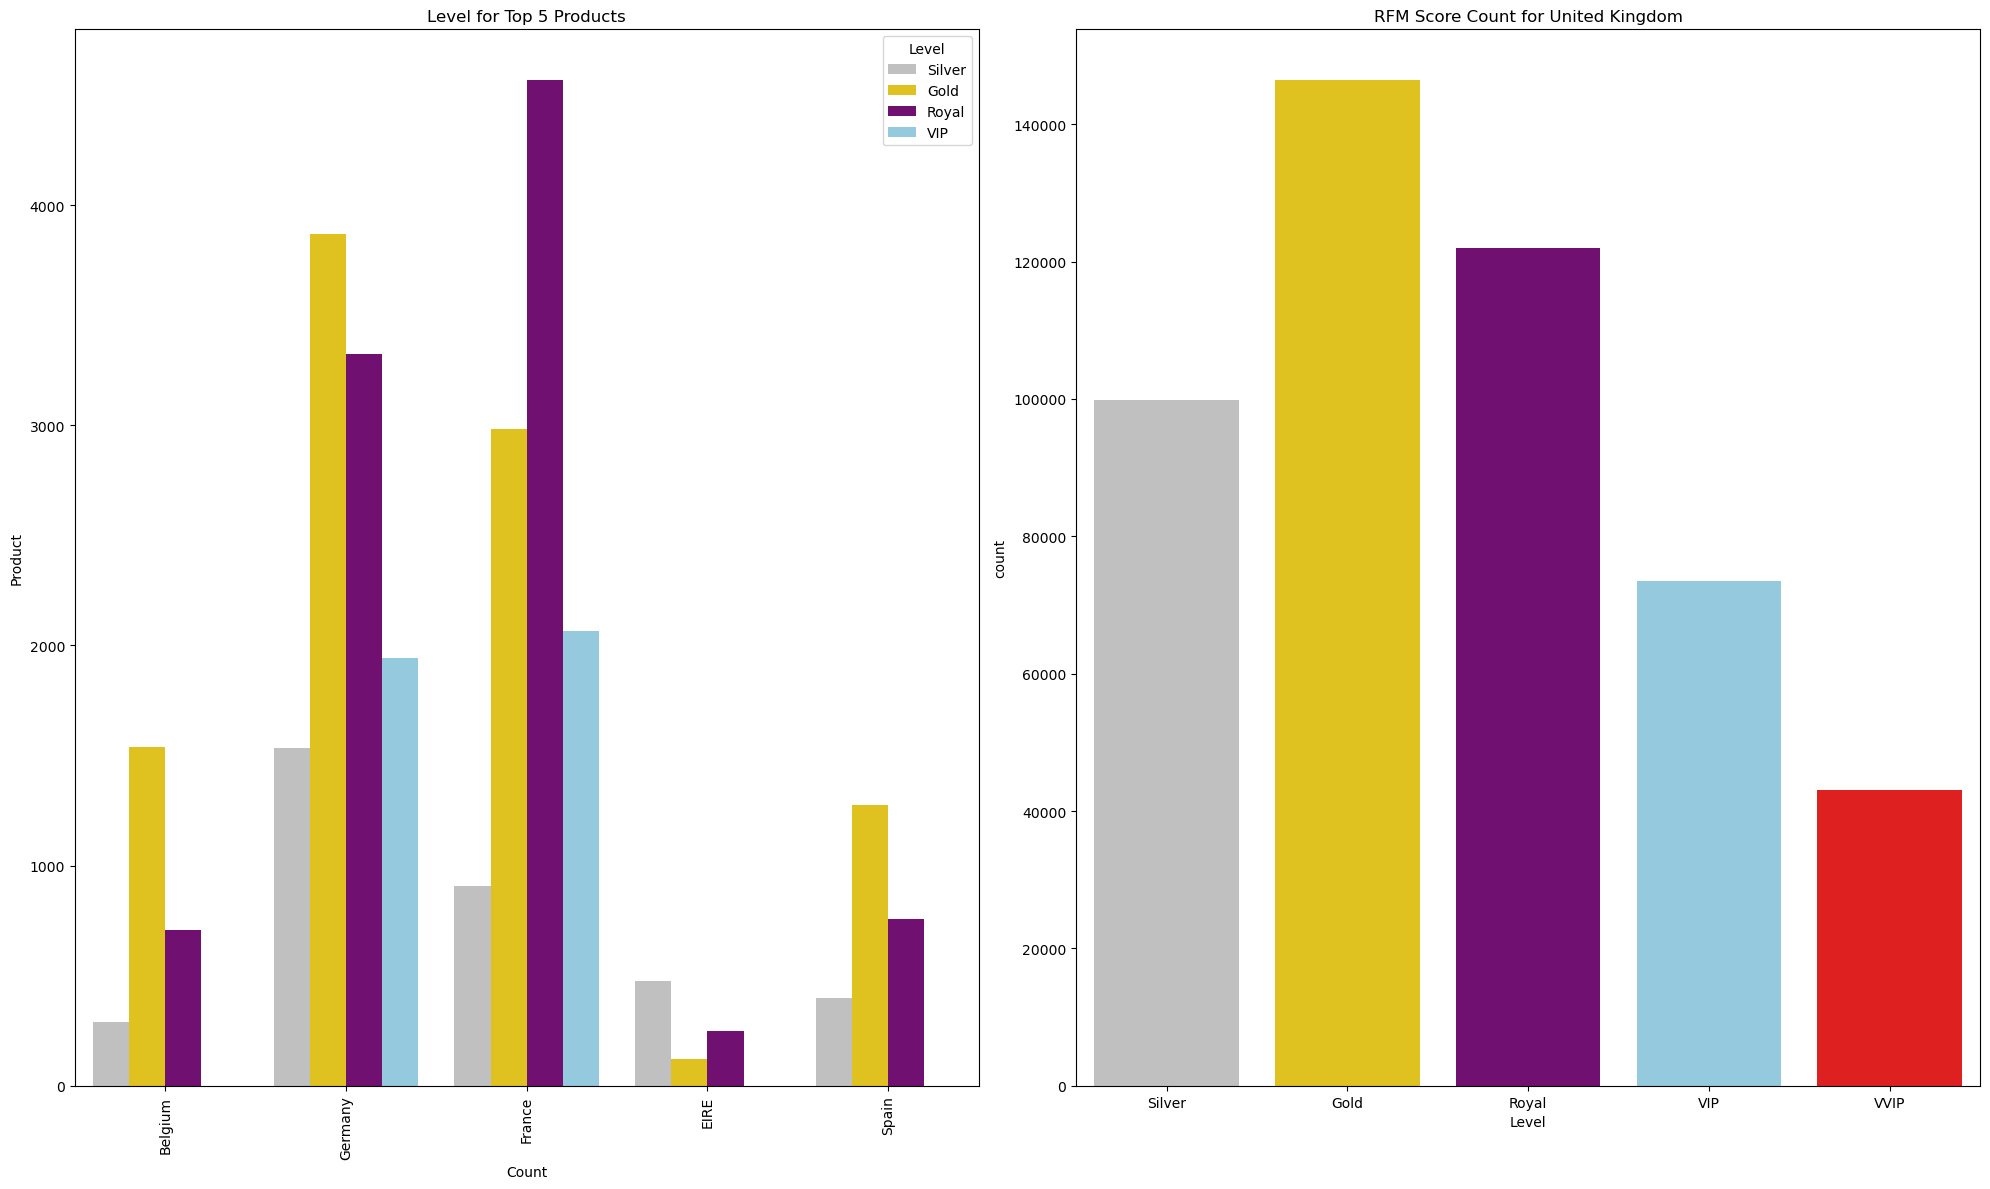

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {'Silver': 'silver', 'Gold': 'gold', 'Royal': 'purple', 'VIP': 'skyblue','VVIP': 'red'}
order_columns =  ['Silver', 'Gold','Royal','VIP','VVIP']
order_columns1 =  ['Silver', 'Gold','Royal','VIP']
# 영국을 제외한 상위 10개 국가 선택 (영국 국적을 가진 회원들의 수가 매우 많기 때문에)
# nlargest() = 열을 기준으로 가장 큰 값을 가지는 요소들을 선택하는 메서드이며, 가장 큰 값을 가지는 
#상위 N개의 요소를 선택할 때 사용함

# 영국을 제외한 상위 10개 국가 선택 (영국 국적을 가진 회원들의 수가 매우 많기 때문에)
# 인덱스 슬라이싱을 사용하여 영국을 제외한 상위 5개 국가 추출 
top_countries = merge_df[merge_df['Country'] != 'United Kingdom']['Country'].value_counts().index[:5]

# 상위 10개 국가에 해당하는 데이터 필터링
filtered_df = merge_df[merge_df['Country'].isin(top_countries)]

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# 왼쪽 그래프: 영국을 제외한 상위 10개 국가에 대한 등급별 RFM 합산 차트 시각화
# sns.countplot(ax=axes[0], x='Country', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
# axes[0].set_title('RFM Score Count for Country (Top 10 Excluding UK)')
# axes[0].set_xlabel('Country')
sns.countplot(ax=axes[0], x='Country', hue='Level', data=merge_df[merge_df['Country'].isin(top_countries)], palette=colors, hue_order=order_columns1)
axes[0].set_title('Level for Top 5 Products')
axes[0].set_ylabel('Product')
axes[0].set_xlabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
# 오른쪽 그래프: 영국(United Kingdom)에 대한 등급별 RFM 합산 차트 시각화 
uk_df = merge_df[merge_df['Country'] == 'United Kingdom']
sns.countplot(ax=axes[1], x='Level', order=order_columns, data=uk_df, palette=colors)
axes[1].set_title('RFM Score Count for United Kingdom')
axes[1].set_xlabel('Level')

plt.tight_layout()
plt.show()

In [34]:
france = merge_df[merge_df['Country'] == 'France']
france

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Recency,TotalScore,Level
17120,581587,2019/12/09,22631,Circus Parade Lunch Box,6.19,12,12680,France,1,1.005671,Royal
17121,581587,2019/12/09,22556,Plasters In Tin Circus Parade,6.19,12,12680,France,1,1.005671,Royal
17122,581587,2019/12/09,22555,Plasters In Tin Strongman,6.19,12,12680,France,1,1.005671,Royal
17123,581587,2019/12/09,22728,Alarm Clock Bakelike Pink,6.19,4,12680,France,1,1.005671,Royal
17124,581587,2019/12/09,22727,Alarm Clock Bakelike Red,6.19,4,12680,France,1,1.005671,Royal
...,...,...,...,...,...,...,...,...,...,...,...
534619,536852,2018/12/03,22544,Mini Jigsaw Spaceboy,10.68,24,12686,France,372,0.006650,Silver
534620,536852,2018/12/03,22539,Mini Jigsaw Dolly Girl,10.68,24,12686,France,372,0.006650,Silver
534621,536852,2018/12/03,22661,Charlotte Bag Dolly Girl Design,11.12,10,12686,France,372,0.006650,Silver
534622,536852,2018/12/03,21791,Vintage Heads And Tails Card Game,11.53,12,12686,France,372,0.006650,Silver
